# Logistic regression

Logistic regression is a supervised machine learning algorithm that predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category, or class. These probabilities can then be used to assign, or classify, observations to the more probable group.

For example, we could use a logistic regression model to predict the probability that an incoming email is spam. If that probability is greater than 0.5, we could automatically send it to a spam folder. This is called binary classification because there are only two groups (eg., spam or not spam).

## Log-odds

 The whole left-hand side of this equation is called log-odds because it is the natural logarithm (ln) of odds (p/(1-p)). The right-hand side of this equation looks exactly like regular linear regression!

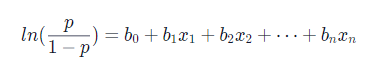

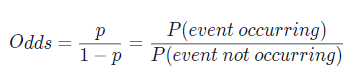

For example, suppose that the probability a student passes an exam is 0.7. That means the probability of failing is 1 - 0.7 = 0.3. Thus, the odds of passing are 0.7 / 0.3 = 2.33

Odds can only be a positive number. When we take the natural log of odds (the log odds), we transform the odds from a positive value to a number between negative and positive infinity — which is exactly what we need


In [6]:
import numpy as np

# Calculate odds_of_rain
odds_of_rain = 0.4 / (1 - 0.4)
print(odds_of_rain)

# Calculate log_odds_of_rain
log_odds_of_rain = np.log(odds_of_rain)
print(log_odds_of_rain)

# Calculate odds_on_time
odds_on_time = 0.9 / (1 - 0.9)
print(odds_on_time)

# Calculate log_odds_on_time
log_odds_on_time = np.log(odds_on_time)
print(log_odds_on_time)

0.6666666666666667
-0.4054651081081643
9.000000000000002
2.1972245773362196


## Sigmoid Function

Allows us to turn log_odds (odds with +- infinity) into a probability score from 0-1.  This is via the sigmoid function, which is the inverse of the logit function. The sigmoid function produces the S-shaped curve we saw previously:

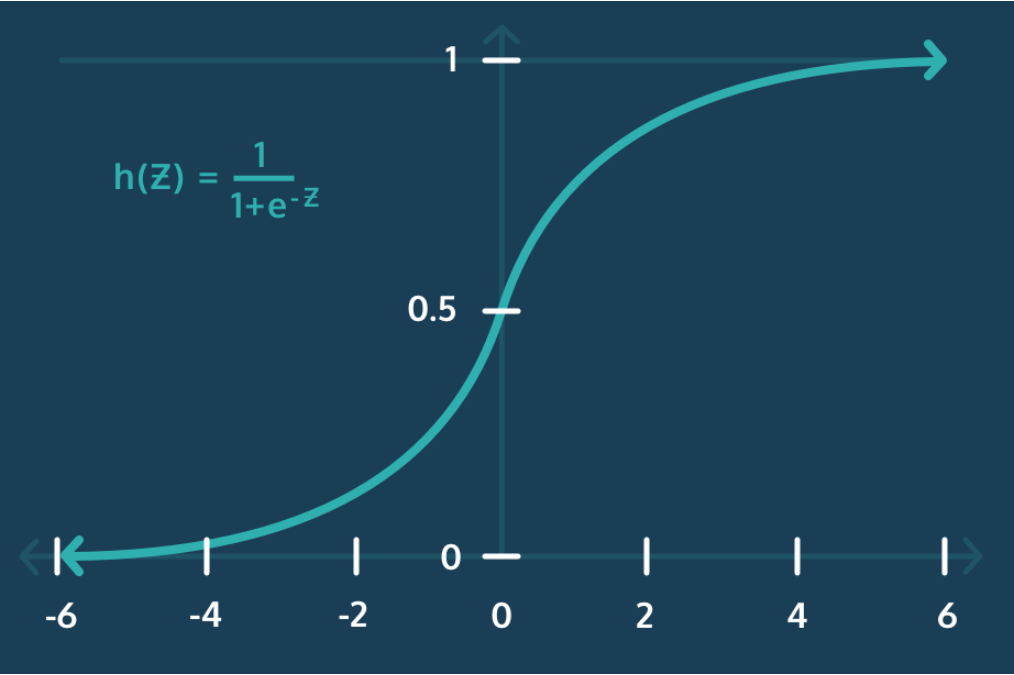



In [7]:
# Import libraries and data
import pandas as pd
import numpy as np
codecademyU = pd.read_csv('codecademyU.csv')

# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']]
passed_exam = codecademyU[['passed_exam']]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(hours_studied,passed_exam)

# Save intercept and coef
intercept = model.intercept_
coef = model.coef_

# Calculate log_odds here
log_odds = intercept + coef * hours_studied
print(log_odds)

# Calculate pred_probability_passing here using sigmoid function. Displays probability from 0-1
pred_probability_passing = np.exp(log_odds)/(1+ np.exp(log_odds))
print(pred_probability_passing)

FileNotFoundError: [Errno 2] No such file or directory: 'codecademyU.csv'

The coefficients can be interpreted as follows:

Large positive coefficient: a one unit increase in that feature is associated with a large increase in the log odds (and therefore probability) of a datapoint belonging to the positive class (the outcome group labeled as 1)

Large negative coefficient: a one unit increase in that feature is associated with a large decrease in the log odds/probability of belonging to the positive class.

Coefficient of 0: The feature is not associated with the outcome.

In [ ]:
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Print the intercept and coefficients here:
print(cc_lr.intercept_)
print(cc_lr.coef_)

Using a trained model, we can predict whether new datapoints belong to the positive class (the group labeled as 1) using the .predict() method. The input is a matrix of features and the output is a vector of predicted labels, 1 or 0.

If we are more interested in the predicted probability of group membership, we can use the .predict_proba() method. The input to predict_proba() is also a matrix of features and the output is an array of probabilities, ranging from 0 to 1:

In [ ]:
# Print out the predicted outcomes for the test data
print(cc_lr.predict(X_test))

# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test))

# Print out the true outcomes for the test data
print(y_test)

## Classification thresholding

The default threshold for sklearn is 0.5. If the predicted probability of an observation belonging to the positive class is greater than or equal to the threshold, 0.5, the datapoint is assigned to the positive class.

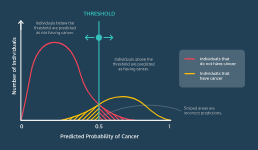

We can choose to change the threshold of classification based on the use-case of our model. For example, if we are creating a logistic regression model that classifies whether or not an individual has cancer, we may want to be more sensitive to the positive cases. We wouldn’t want to tell someone they don’t have cancer when they actually do!

In order to ensure that most patients with cancer are identified, we can move the classification threshold down to 0.3 or 0.4, increasing the sensitivity of our model to predicting a positive cancer classification. While this might result in more overall misclassifications, we are now missing fewer of the cases we are trying to detect: actual cancer patients.

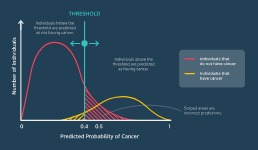



## Confusion matrix

When evaluating success of model, data scientists often look at a confusion matrix, which shows the number of true positives, false positives, true negatives, and false negatives.

For example, suppose that the true and predicted classes for a logistic regression model are:

In [ ]:
y_true = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1]
y_pred = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[3 2]
 [1 4]]


This output tells us that there are 3 true negatives, 1 false negative, 4 true positives, and 2 false positives. Ideally, we want the numbers on the main diagonal (in this case, 3 and 4, which are the true negatives and true positives, respectively) to be as large as possible.

## Accuracy, Recall, Precision, F1 Score

(T = true, F = false, P = positive, N = negative). For all of these metrics, a value closer to 1 is better and closer to 0 is worse.

Accuracy = (TP + TN)/(TP + FP + TN + FN)

Precision = TP/(TP + FP)

Recall = TP/(TP + FN)

F1 score: weighted average of precision and recall

In [ ]:
# accuracy:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))
# output: 0.7

# precision:
from sklearn.metrics import precision_score
print(precision_score(y_true, y_pred))
# output: 0.67

# recall: 
from sklearn.metrics import recall_score
print(recall_score(y_true, y_pred))
# output: 0.8

# F1 score
from sklearn.metrics import f1_score
print(f1_score(y_true, y_pred))
# output: 0.73

0.7
0.6666666666666666
0.8
0.7272727272727272
